the mass flow rate required is: [5.09845913]
the Reynolds number is: [255573.21990057]
[7267.0695357]


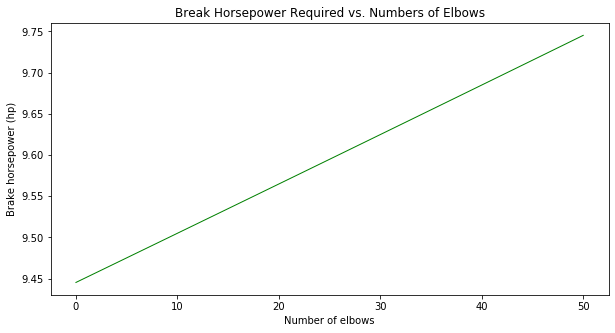

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy import pi

## INPUT PARAMETERS
L1 = 150 # Length from resovoir to pump[m]
D1 = 0.1016 # Diameter of pipe 1 [m]
A1 = pi*(D1/2)**2 #[m^2]
L2 = 5.25 #[m]
D2 = 0.0254 #[m]
A2 = np.pi*D2**2/4 #[m^2]
h1 = 10.25 # height from pump to resovoir [m]
h2 = 5.75 # height from pump to heat exchanger [m]
P_out = 625000 # pressure [Pa]
Rr = 0.001 # Relative roughness
rho = 1000 #[kg/m^3]
mu = 1e-3 #[Pa s]
g = 9.81 #[m/s^2]

# Minor Friction Factor Coefficients
C_cont = 0.5
C_reg_t = 1.5
C_long_t = 0.7
C_long_f = 0.2

## PART A) ------------------------------------------------------------------------------

W_p = 7530*0.635 #[J/s] Work

def func(u1):
    Re1 = rho*u1*D1/mu
    Re2 = rho*(u1*A1/A2)*D2/mu
    
    f1 = (-3.6*np.log10(6.9/Re1+(Rr/3.7)**1.11))**(-2)
    f2 = (-3.6*np.log10(6.9/Re2+(Rr/3.7)**1.11))**(-2)

    EF_cont = C_cont*u1**2/2
    EF_major1 = f1*2*L1*u1**2/D1
    EF_major2 = f2*2*L2*(A1*u1/A2)**2/D2
    EF_elbows = u1**2/2*8*C_reg_t+(A1*u1/A2)**2/2*2*C_long_t+(A1*u1/A2)**2/2*C_long_f
    
    EF= EF_cont + EF_major1 + EF_major2 + EF_elbows
    
    return W_p + (rho*A1*u1)*(0.5*(-(A1*u1/A2)**2)+g*(h1-h2)-(P_out/rho)-EF)

u1 = fsolve(func,1)
mass = rho*u1*A1 # could have used either of u1 or u2 in calcs since looking for mass flow only
Re = rho*A1*u1/A2*D2/mu

print("the mass flow rate required is:",mass)
print("the Reynolds number is:",Re)

## PART B) -----------------------------------------------------------------------------

Pow_conversion = 745.7 # 745.7W/1hp

n = np.linspace(0,50,51)
Brake_hp = np.linspace(0,0,51)
N = len(n)

u2 = A1*u1/A2
Re1 = rho*u1*D1/mu
Re2 = rho*u2*D2/mu
f1 = (-3.6*np.log10(6.9/Re1+(Rr/3.7)**1.11))**-2
f2 = (-3.6*np.log10(6.9/Re2+(Rr/3.7)**1.11))**-2

C_cont = 0.5
C_regular90thread = 1.5
C_long90thread = 0.7
C_long90flanged = 0.2

EF_cont = C_cont*u1**2/2
EF_major2 = f2*2*L2*u2**2/D2

def func2(P,W2):
    return P*(-0.48*(P/1000)**2+8.2*(P/1000)+31)/100-W2

for i in range (N):
    Length = (L1 - (8*8)) + 8*i # Subtract all 8 existing elbows and start from i = 0
    Ef_major1 = f1*2*Length*u1**2/D1
    Ef_elbows = u1**2/2*i*C_reg_t + u2**2/2*C_long_t + u2**2/2*C_long_f
    Ef2 = EF_cont + Ef_major1 + EF_major2 + Ef_elbows
    W2 = -(mass*(0.5*(-u2**2) + g*(h1 - h2) - P_out/rho - Ef2))
    P = fsolve(func2,1,args=(W2))
    Brake_hp[i] = P/Pow_conversion
    
print(P)

plt.figure(figsize=(10,5))
plt.title("Break Horsepower Required vs. Numbers of Elbows")
plt.xlabel('Number of elbows')
plt.ylabel('Brake horsepower (hp)')
plt.plot(n,Brake_hp,'g-',linewidth = 1)
plt.show()